# SIMULACIÓN | PROYECTO UNIDAD 1




## INSTRUCCIONES

- El objetivo del proyecto es poner en práctica los contenidos aprendidos en la primera unidad de Probabilidades, con el uso de un set de datos real extraidos de un medio libre. En algunos casos deberá investigar ciertos contenidos para apoyar sus conclusiones.  


- Se presentan las actividades a desarrollar, cada una de ella contiene un set de instrucciones, preguntas y su puntaje asociado. Las preguntas deben ser respondidas en celdas de texto (no se considera respuesta si está en un comentario entre las líneas de código)


- Al finalizar presente las conclusiones de su trabajo. 


- Debe subir a siveduc en la tarea Proyecto1, su notebook y el archivo de datos utilizado.


- El título del notebook debe ser: proyecto1_Apellido1_Apellido2_Apellido3


- Fecha límite de entrega: lunes 7 de noviembre 13 horas


- Este trabajo pondera un 25% del total del curso 

**Integrantes:** 
* Gastón Bustamante
* Sebastián Lara
* Felipe Vidal

In [2]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
import statistics
import scipy.stats 
from IPython.display import Image

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.dpi'] = 100

import seaborn as sns

from IPython.core.pylabtools import figsize

In [2]:
import random

## Parte I : Propiedades de las Probabilidades



A continuación se presenta la simulación de una población, representada por el dinero que dispone cada persona y sus transacciones económicas. 

1. (1 punto) Analice la simulación, realice las siguientes modificaciones en el proceso e interprete sus resultados:

    (a) Modifique la distribución inicial de dinero. ¿Cómo se comporta el coeficiente de Gini y la distribución de la riqueza?
    
    (b) Modifique la función de transacción para aumentar o disminuir el índice de Gini. 
    
    (c) Comente la simulación propuesta ¿Qué otros factores inciden en los resultados de la simulación?
    
    
2. (1 punto) Defina eventos de interés $A$, $B$ y $C$ y calcule las siguientes probabilidades mediante la simulación propuesta:

    (a) $P(A), P(B) y P(C)$ 
    
    (b) $P(A \cup B) $ 

    (c) $P(A \mid C)$
    
Ejemplos de eventos de interés (defina sus propios eventos):
- La mediana de la población es mayor o igual que $x$ pesos.
- El percentil 10% es mayor o igual que $y$ pesos
- El coeficiente de gini de la población es menor que $0.3$


#### Referencia:
https://nbviewer.jupyter.org/url/norvig.com/ipython/Economics.ipynb

**gini**: Definición de la métrica de equidad de gini 

**transaccion**: accion de intercambio de dinero, puede ser justa o injusta

**interaccion**: eleccion de los actores que realizan la transacción

**simula**: funcion de simulacion, dinerop: lista que representa la cantidad de dinero actual que tiene cada persona, T: cantidad de iteraciones 

In [4]:
def gini(y):
    "Calcula el coeficiente de Gini: una medida de la equidad/inequidad en la"
    "población y (representada por una lista que contabiliza el dinero actual de cada persona."
    y = sorted(y)
    n = len(y)
    numer = 2 * sum((i+1) * y[i] for i in range(n))
    denom = n * sum(y)
    return (numer / denom) - (n + 1) / n

def transaccion(A, B):
    "Reune el dinero de A y B en un pozo y luego lo distribuye aleatoriamente entre los dos actores."
    pozo = A + B
    parte1 = random.uniform(0,pozo)
    return parte1, pozo - parte1

def transaccion_injusta(A, B): return random.choice(([A + B, 0], [0, A + B]))

def interaccion(N): return random.sample(range(N), 2)

def percent(pct, items):
    "The item that is pct percent through the sorted list of items."
    return items[min(len(items)-1, len(items) * pct // 100)]



**SIMULACIÓN: modifíquela para realizar sus cálculos **

In [5]:

def simula(dinerop, T):
    "Ejecuta simulacion de dinerop para T transacciones; devuelve dinerop en cada paso." 
    dinerop = dinerop.copy()
    yield dinerop
    for t in range(1, T + 1):
        i, j = interaccion(len(dinerop))
        dinerop[i], dinerop[j] = transaccion(dinerop[i], dinerop[j]) 
        yield dinerop

*** Ejemplo de la simulación con una poblacion, donde los cuatro actores inician con 100$ y 8 iteraciones ***

In [6]:
#Ejemplo simple de simular una población de 4 actores, con $100 cada uno inicialmente y 8 iteraciones:
for pop in simula([100] * 4, 8):
    print(pop)

[100, 100, 100, 100]
[100, 83.94079200064681, 116.05920799935319, 100]
[100, 146.71070117221137, 53.28929882778861, 100]
[93.48399361173283, 146.71070117221137, 59.8053052160558, 100]
[93.48399361173283, 146.71070117221137, 147.67984510385386, 12.125460112201921]
[176.68283232395294, 146.71070117221137, 64.48100639163374, 12.125460112201921]
[172.57231960138688, 146.71070117221137, 64.48100639163374, 16.235972834767978]
[172.57231960138688, 136.04709387737512, 64.48100639163374, 26.89958012960423]
[172.57231960138688, 42.548281826045695, 64.48100639163374, 120.39839218093366]


*** Puede tomar como ejemplo los siguientes gráficos y estadísticas presentadas *** 

In [7]:
import statistics

def percent(pct, items):
    "Devuelve el item que corresponde al porcentaje pct (acumulado) en la lista ordenada de items."
    return items[min(len(items)-1, len(items) * pct // 100)]

def show(dinerop, k=40, percentiles=(1, 10, 50, 90, 99), **kwargs):
    "Ejecuta simulación en k*N pasos, imprimiendo estadísticos y desplegando un histograma. "
    N = len(dinerop)
    inicio = list(dinerop)
    resultado = [(t, sorted(pop)) # Ordena resultados para poder calcular percentiles
               for (t, pop) in enumerate(simula(dinerop, k * N, **kwargs))
               if t % (N / 10) == 0]
    times = [t for (t, pop) in resultado]
    # Printout:
    print('   t    Gini stdev' + (' {:3d}%' * len(percentiles)).format(*percentiles))
    print('------- ---- -----' + ' ----' * len(percentiles))
    fmt = '{:7,d} {:.2f} {:5.1f}' + ' {:4.0f}' * len(percentiles)
    for (t, pop) in resultado:
        if t % (4 * N) == 0:
            data = [percent(pct, pop) for pct in percentiles]
            print(fmt.format(t, gini(pop), statistics.stdev(pop), *data))
    # Plot:
    plt.xlabel('riqueza'); plt.ylabel('tiempo'); plt.grid(True)
    for pct in percentiles:
        line = [percent(pct, pop) for (t, pop) in resultado]
        plt.plot(line, times)
    plt.show()
    # Histogram:
    R = (min(pop+inicio), max(pop+inicio))
    plt.hist(inicio, label='inicio',range=R, alpha=0.5)
    plt.hist(pop,label='final', range=R,alpha=0.5)
    plt.legend(loc='upper right')
    plt.show()           


   t    Gini stdev   1%  10%  50%  90%  99%
------- ---- ----- ---- ---- ---- ---- ----
      0 0.11  19.9   54   74  100  125  145
 20,000 0.49  96.1    1   11   72  224  442
 40,000 0.50  99.3    1   10   69  231  460
 60,000 0.50  99.6    1   10   70  230  448
 80,000 0.50  98.8    1   10   69  227  453
100,000 0.50  99.9    1   11   69  227  456
120,000 0.50 100.7    1   11   67  234  456
140,000 0.50  99.0    1   11   68  231  459
160,000 0.49  97.8    1   10   70  226  453
180,000 0.50  99.0    1   11   70  226  459
200,000 0.50  99.3    1   10   69  232  445


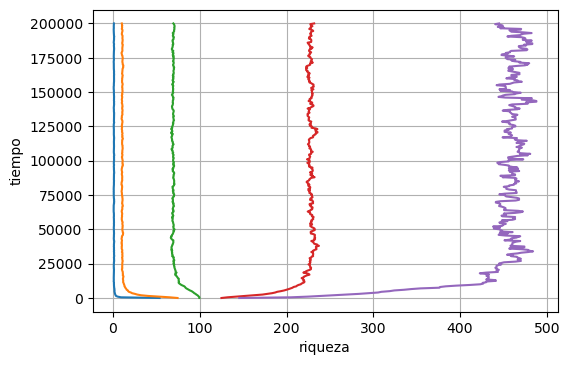

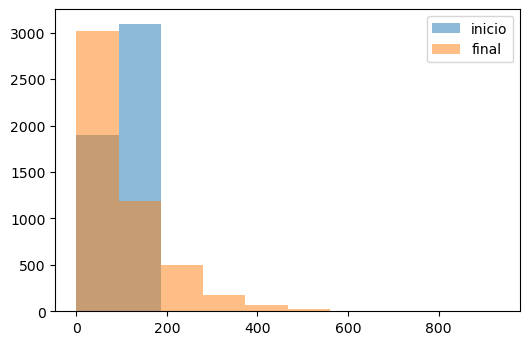

In [8]:
N  = 5000 # Tamaño de la población
MU = 100. # Dinero medio en la población

dinerop = [random.gauss(mu=MU, sigma=MU/5) for actor in range(N)]

show(dinerop)

## I. ESTO ES DE BOCCA
### 1

a) Al cambiar de distribucion a una distribucion exponencial se puede observar que el indice de gini se mantiene cercano al valor 0.5 sin importar el valor de t (numero de transacciones realizadas) lo que nos indica que hay una alta desigualdad reflejandose directamente en la distribucion de riqueza en donde ademas se puede observar que esta desigualdad se mantiene en el tiempo desde el principio.

b) Al usar una transaccion binomial en vez de una uniforme, el dinero se distribuye de forma muy desigual, lo cual se ve en un gini que se mantiene sobre el 0.8, concentrando mucho dinero en un una muy pequeña parte de la población y muy poco dinero para el resto, superando incluso a los coeficientes de gini de los paises mas desiguales del mundo (como sudáfrica) los cuales no superan el 0.7

c) Obviando la distribución y la forma en la que se hace la transacción, después de variar el tamaño de la población (aumentarla y disminuiarla), el dinero medio por actor (aumentarlo y disminuirlo) y el número de interacciones (aumentarlo y disminuirlo), concluimos que ningún otro valor incide en el resultado final de la simulación, puesto que siempre se llegaba al mismo coeficiente de gini y en el mismo lapso de t.

#### 2

## Parte II: Distribuciones 

Busque un conjunto de datos disponible en un repositorio público, que contenga un conjunto de datos (al menos 1000 datos) de una variable aleatoria a valores reales. Utilice el set de datos para realizar las siguientes actividades:

Ejemplo de repositorio de datos climáticos: www.cr2.cl

0. Indique la fuente de sus datos. 


1. (0,5 pts) Descripcion de datos:  describa sus datos estadísticamente, grafique histograma y distribución de probabilidad empírica. Mencione alguna característica particular de su set de datos. 

2. (1 punto) Seleccione aleatoriamente una cantidad N de sus datos y calcule 3 estadísticos muestrales, luego aumente la cantidad de datos seleccionado (N++), grafique los valores de los estadísticos muestrales en cada iteración ¿qué ocurre con los estadísticos muestrales a medida que aumenta N?. Investigue y responda en base a la ley de los grandes números.

3. (1 punto) Divida su set de datos en distintos grupos (aleatoriamente) y calcule los estadísticos muestrales de cada grupo y grafique el histograma resultante. Por ejemplo: para el caso de la media, debe calcular la media para cada grupo y luego graficar el histograma del conjunto de medias. ¿los estadísticos muestrales cumplen el Teorema del Límite Central? Justifique su respuesta.

4. (0,5 pts) Defina una hipótesis sobre la distribución que siguen sus datos, utilice el test Kolmogorov-Smirnov ¿Puede rechazar la hipótesis? (usando un 95% de confianza). Comente sus resultados.

5. (1 punto) Calcule la incerteza de sus estadísticos muestrales utilizando bootstrap. Interprete sus resultados. 


## 2.1

In [4]:
vino = pd.read_csv('winequality-red.csv',delimiter=";")

In [4]:
vino

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [19]:
datos = vino['alcohol']
datos.describe()

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

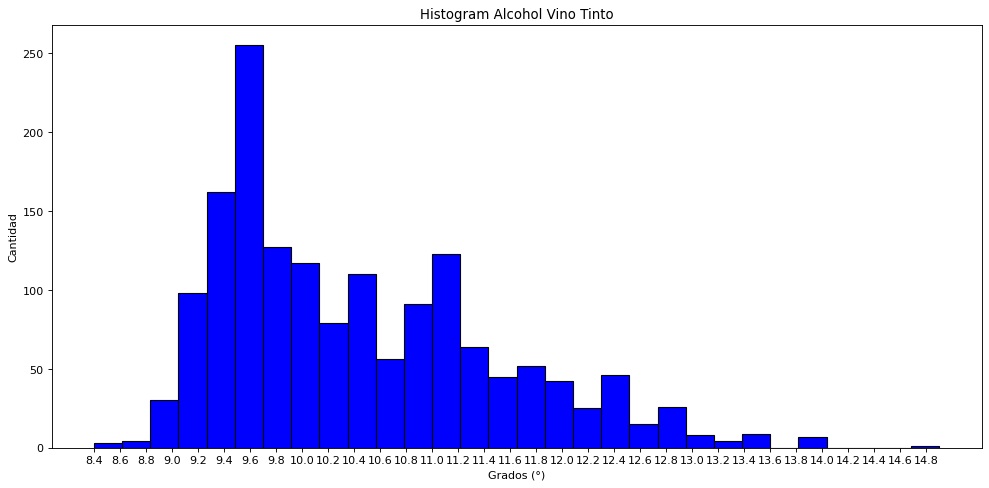

In [5]:

fig, ax = plt.subplots(1, 1,figsize=(15, 7), dpi=80)

# Make the histogram using matplotlib, bins must be integet
ax.hist(datos, color = 'blue',edgecolor='black', bins=(int(15/0.5)))

plt.title('Histogram Alcohol Vino Tinto')
plt.xlabel('Grados (°)'); plt.ylabel('Cantidad');
plt.xticks(np.arange(8.4, 15, 0.2))

plt.show()

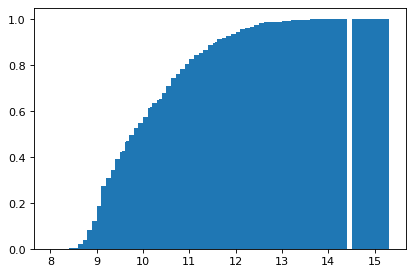

In [6]:
def ecdf(data):
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

x,y = ecdf(datos)
ax.bar(x,y)

plt.draw()

Vamos a analizar un dataset de vinos tintos en el cual posee 12 columnas entre la que encontramos mas interesante para analizar la cantidad de alcohol presente en estos para obtener sus estadisticas asociadas.
Como vimos anteriormente en el histograma y ahora en la distribucion acumulada tenemos un dato extremo que nos empeora la grafica el cual se aleja por casi un grado del maximo anterior, por lo cual en el grafico acumulado posee una caida en el final.

In [7]:
N = 150
aleatoria = np.random.choice(list(datos),N,replace= False)
aleatoria

array([ 9.4 ,  9.8 ,  9.9 , 11.  ,  9.3 ,  9.8 ,  9.9 , 12.2 ,  9.  ,
        9.9 , 12.1 , 11.  , 10.5 ,  9.5 , 10.1 , 12.2 ,  9.3 , 10.  ,
        9.8 , 10.6 ,  9.5 ,  9.9 ,  9.4 , 10.8 , 12.8 , 11.  , 11.2 ,
        9.8 , 10.8 ,  9.8 , 10.1 , 10.2 , 12.7 , 10.8 ,  9.5 ,  9.5 ,
        9.4 ,  9.  , 14.  , 10.4 , 11.4 , 11.6 ,  9.3 ,  9.5 ,  9.4 ,
       12.6 , 11.5 , 10.5 ,  9.8 ,  9.6 ,  9.4 , 11.6 ,  9.5 , 10.  ,
       11.  , 10.7 ,  9.4 ,  9.5 ,  9.5 , 11.3 ,  9.6 , 12.8 , 11.6 ,
        9.  , 11.  , 11.6 , 10.4 ,  9.7 , 12.  ,  9.5 , 10.1 ,  9.5 ,
        9.6 ,  9.2 ,  9.8 , 10.5 , 11.  , 11.  , 12.7 ,  9.  , 11.5 ,
       11.8 ,  9.4 , 11.9 ,  9.5 , 11.1 , 11.3 , 12.  ,  9.8 , 11.9 ,
       11.2 ,  9.7 , 10.9 ,  9.4 , 13.1 , 10.9 , 11.8 ,  9.8 , 11.2 ,
        9.25, 11.3 , 11.3 , 10.1 ,  9.5 , 10.  , 10.8 , 11.3 ,  9.4 ,
        9.7 ,  9.4 ,  9.6 ,  9.4 ,  9.6 , 12.5 , 11.5 ,  9.3 ,  9.2 ,
        9.7 ,  9.4 , 11.7 , 11.1 , 10.6 ,  9.5 , 10.6 , 11.1 , 11.1 ,
       12.4 ,  9.9 ,

In [8]:
promedio = sum(aleatoria)/len(aleatoria)
varianza = statistics.variance(aleatoria)
mediana = statistics.median(aleatoria)
print('Promedio:',promedio)
print('Varianza:',varianza)
print('Mediana:',mediana)

Promedio: 10.493000000000002
Varianza: 1.214329865771812
Mediana: 10.1


In [18]:
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider, FloatSlider, HBox
import ipywidgets as widgets

Nn = IntSlider(min=49, max=1599, step=50, value= 100) #Valor de n variable

def slider(N_n):
    
    n = N_n # valor original 150
    aleatoria = np.random.choice(list(datos),N_n,replace= False)
    promedio = sum(aleatoria)/len(aleatoria)
    varianza = statistics.variance(aleatoria)
    mediana = statistics.median(aleatoria)

    print('Promedio:',promedio)
    print('Varianza:',varianza)
    print('Mediana empírica:', mediana)
    
ip = interactive(slider,N_n=Nn)
display(HBox(ip.children[:-1]))#Show all controls
display(ip.children[-1])#Show the output

Output()

In [24]:
N = np.arange(99,1599,50)
mean = [promedio]
var = [varianza]
med = [mediana]
for i in range(len(N)-1):
    aleat = np.random.choice(datos,N[i+1],replace = False)
    mean += [sum(aleat)/len(aleat)]    
    var += [statistics.variance(aleat)]
    med += [statistics.median(aleat)]

Text(0, 0.5, 'Mediana')

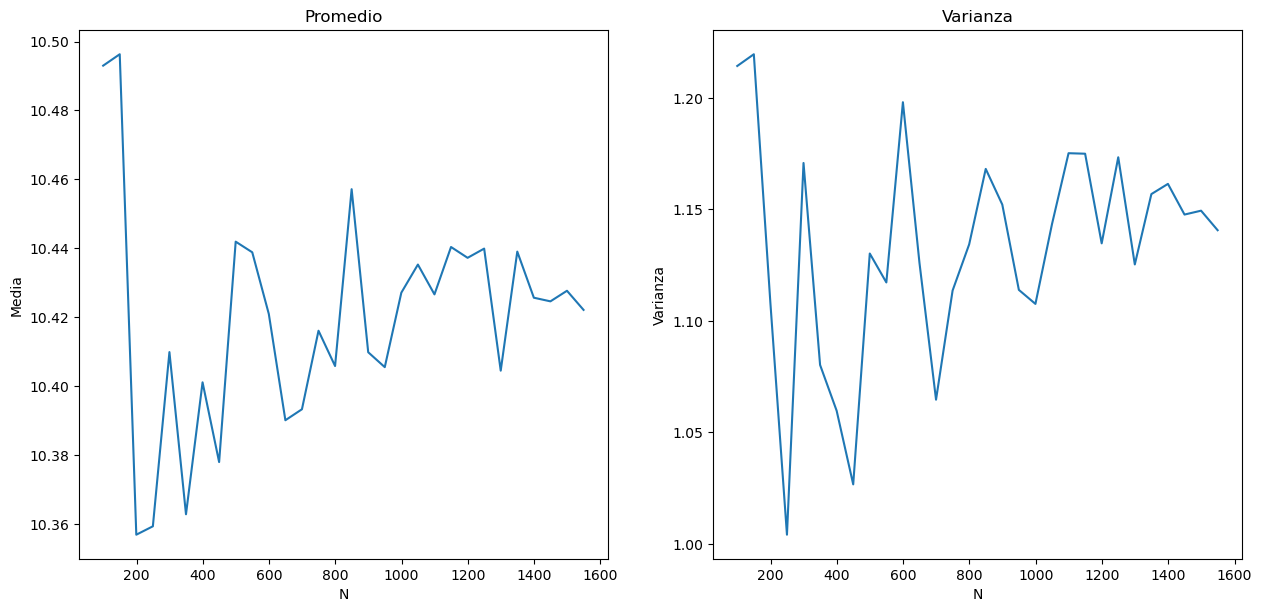

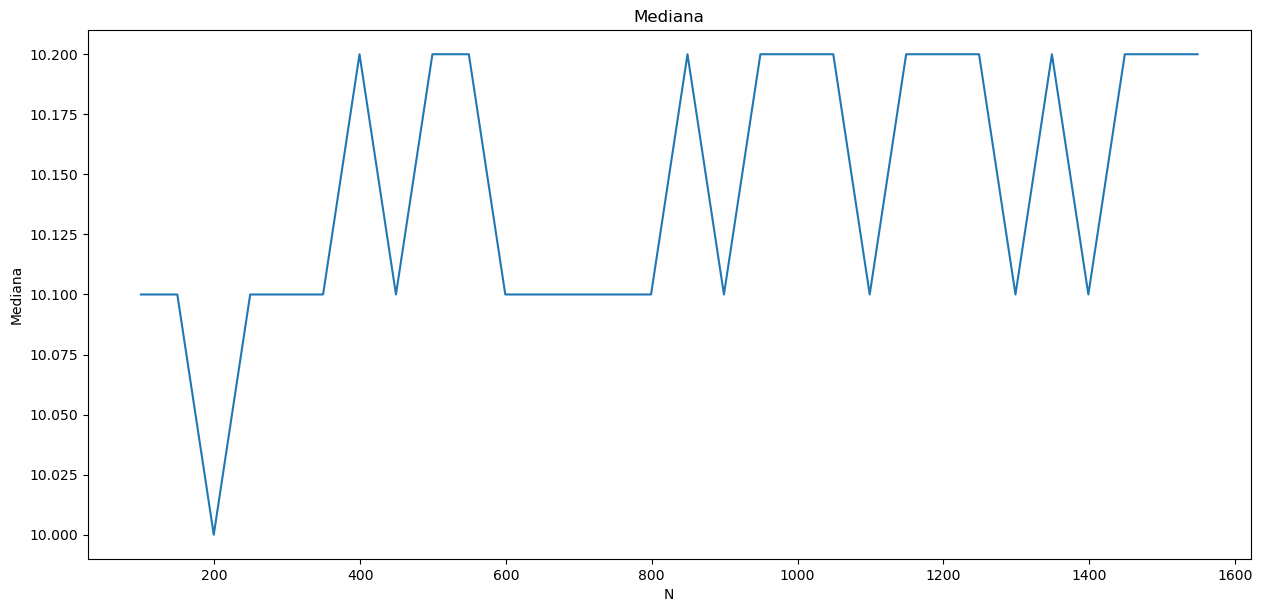

In [25]:
fig, ax = plt.subplots(1,2, figsize=(15, 7))
fig, ax1 = plt.subplots(1, figsize=(15, 7))
ax[0].plot(N,mean)
ax[0].set_title('Promedio')
ax[0].set_xlabel('N')
ax[0].set_ylabel('Media')
ax[1].plot(N,var)
ax[1].set_title('Varianza')
ax[1].set_xlabel('N')
ax[1].set_ylabel('Varianza')
ax1.plot(N,med)
ax1.set_title('Mediana')
ax1.set_xlabel('N')
ax1.set_ylabel('Mediana')

## Mejorar esta conclusion
Segun la ley de los grandes numeros podemos ver que a medida que aumenta nuestra muestra esta comienza los 3 estadisticos comienzan a converger en los valores de la poblacion total. En este caso partir de las 1000 muestras vemos que los valores rondan la media y mediana de nuestra poblacion total. En el caso de la mediana es mas complicado de analizar pues esta es muy sensible a los valores extremos.

In [26]:
n = 1000 # numero de muestras
promedio = []
var = []
med = []
for i in range(n):
    random = np.random.choice(datos,size = 100,replace = True) # size = elementos de la muestra
    promedio += [sum(random)/len(random)]
    var += [statistics.variance(random)]
    med += [statistics.median(random)]

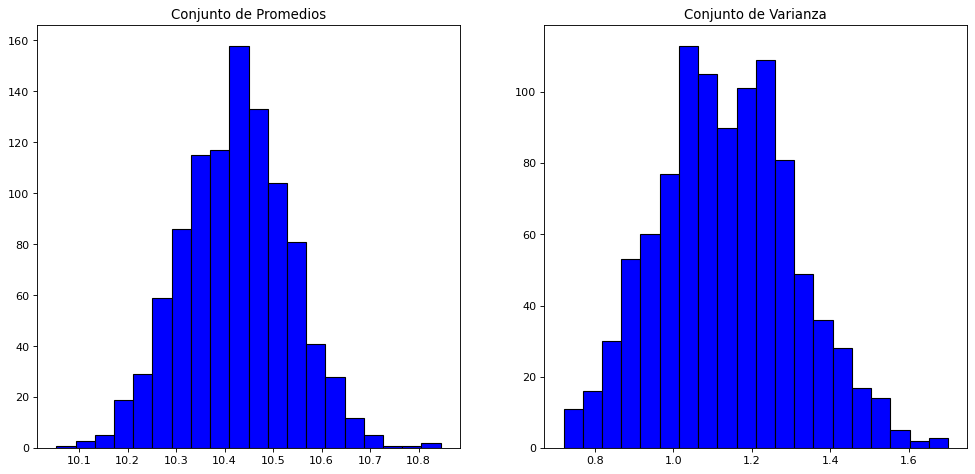

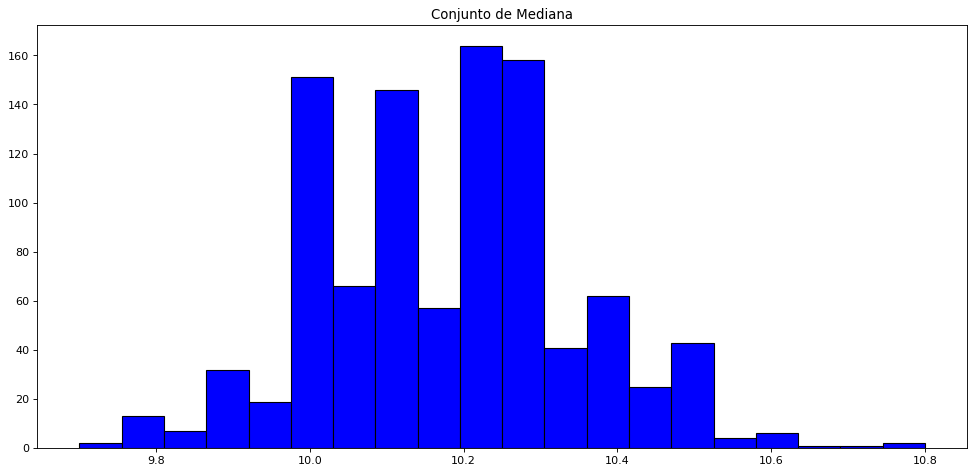

In [29]:
fig, ax = plt.subplots(1, 2,figsize=(15, 7), dpi=80)
fig, ax1 = plt.subplots(1,figsize=(15, 7), dpi=80)
ax[0].hist(promedio, color = 'blue',edgecolor='black', bins=(20))
ax[1].hist(var, color = 'blue',edgecolor='black', bins=(20))
ax1.hist(med, color = 'blue',edgecolor='black', bins=(20))
ax[0].set_title('Conjunto de Promedios');
ax[1].set_title('Conjunto de Varianza');
ax1.set_title('Conjunto de Mediana');

# Agregar Conclusiones


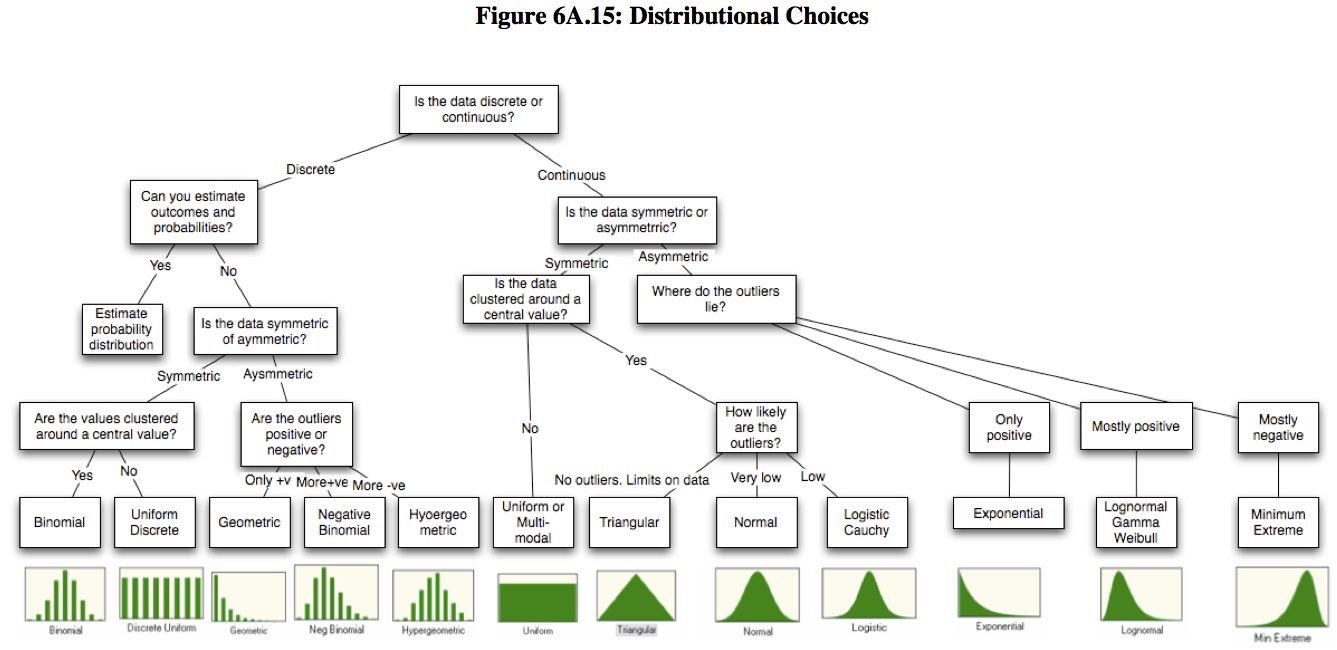

In [39]:
Image("distributions_choice.png")

# Argumentar mas
Segun la imagen de las distribuciones vemos que nuestro histograma se acerca mas a una Lognormal

(0.4596551807488058, 8.121579871759721, 2.0735496300243694)


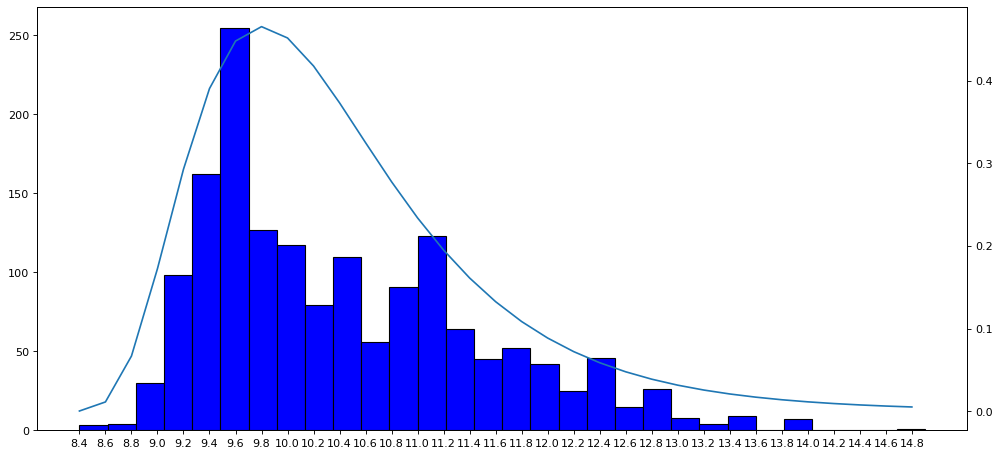

In [33]:
fig, ax = plt.subplots(1, 1,figsize=(15, 7), dpi=80)

ax.hist(datos, color = 'blue',edgecolor='black', bins=(int(15/0.5)))
ax2 = ax.twinx()
args = scipy.stats.lognorm.fit(datos)
print(args)
vec = np.arange(8.4, 15, 0.2)

pvec = []
for i in vec:
    pvec.append(scipy.stats.lognorm.pdf(x=i,s=args[0],scale=args[2],loc=args[1]))
ax2.plot(vec,pvec)
plt.xticks(np.arange(8.4, 15, 0.2))
plt.draw()

In [40]:
datos2 = scipy.stats.lognorm.rvs(*args,size=100)
scipy.stats.kstest(datos, datos2)

KstestResult(statistic=0.12278298936835522, pvalue=0.10738714842249009)

Al comprar la distribución de los datos a una distribución Lognormal con el test Kolmogorov-Smirnov, el test nos retorna un valor p=0.10738714842249009, si lo analizamos con un 95% de confianza NO podemos rechazar la hipótesis ya que p>0.05.

In [10]:
import math
from IPython.display import display, Math
import ipywidgets as widgets

def mse(est, listest): #mean square error
    sum = 0
    a = 0
    for i in listest:
        sum += (est-i)**2
        a +=1
    mse_val = sum/a
    return mse_val    

b = 100
datos = vino["alcohol"]
n = len(datos)

m = statistics.mean(datos)
md = statistics.median(datos)
sd = statistics.stdev(datos)

means = []
medians = []
sds = []

for i in range (b):
    bdata = np.random.choice(list(datos),size=n,replace=True)
    means.append(bdata.mean())
    medians.append(statistics.median(bdata))
    sds.append(statistics.stdev(bdata))

print("\nValor de b: " + str(b))
varMA = statistics.variance(means)
range = 1.96*math.sqrt(varMA)
print("\nVarianza medias: " + str(varMA))
display(Math('%0.2f \pm %0.2f' % (m, range )))
print("Error medio cuadratico de la media aritmetica : " + str(mse(m, means)))
    
varMED = statistics.variance(medians)
range = 1.96*math.sqrt(varMED)
print("\nVarianza medianas: " + str(varMED))
display(Math('%0.2f \pm %0.2f' % (md, range )))
print("Error medio cuadratico de las medianas : " + str(mse(md, medians)))

varSD = statistics.variance(sds)
range = 1.96*math.sqrt(varSD)
print("\nVarianza desviaciones estandar: " + str(varSD))
display(Math('%0.2f \pm %0.2f' % (sd, range )))
print("Error medio cuadratico de las desviaciones estándar : " + str(mse(sd, sds)))


Valor de b: 100

Varianza medias: 0.0006328898254091977


<IPython.core.display.Math object>

Error medio cuadratico de la media aritmetica : 0.0006286915411528309

Varianza medianas: 0.0033242424242424166


<IPython.core.display.Math object>

Error medio cuadratico de las medianas : 0.005499999999999976

Varianza desviaciones estandar: 0.00027665634778496187


<IPython.core.display.Math object>

Error medio cuadratico de las desviaciones estándar : 0.0002739056163170393


### Referencias útiles para la parte II: 



[1] **Ley de los grandes números:**  https://nbviewer.jupyter.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter4_TheGreatestTheoremNeverTold/Ch4_LawOfLargeNumbers_PyMC3.ipynb


[2] Ross, https://drive.google.com/file/d/1tenWSvfAU2336m-km4vRMorKmDIQRKme/view?usp=sharing

## Parte III: Conclusiones


1. (0,8 pts) Presente las conclusiones de su trabajo. 

2. (0,2 pts) Además reflexione respecto a qué significa que los datos sean **independientes e identicamente distribuidos** y por qué se debe cumplir esta condición en los grupos seleccionados aleatoriamente en las preguntas 2 y 3 de la parte II (puede reflexionar en torno a qué pasaría si no lo fueran) 
